<a href="https://colab.research.google.com/github/Andrii-Oliinyk-2726/Data_Science_HW2/blob/main/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


In [4]:
import pandas as pd

file_path = "bestsellers with categories.csv"
table = pd.read_csv(file_path)

table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
# print(table)
print(table.head())
num_rows, num_columns = table.shape
print(' ')
print("Кількість рядків:", num_rows)
print("Кількість стовпців:", num_columns)

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
 
Кількість рядків: 550
Кількість стовпців: 7


Первинне дослідження даних

In [23]:
# Завдання "Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)"
print("Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)")
print(80*'_')
na_count = table.isna().sum()
print(na_count)
print("Відповідь: Чи є в якихось змінних пропуски?  ні")

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
________________________________________________________________________________
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: Чи є в якихось змінних пропуски?  ні


In [24]:
# Завдання "Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)"
print("Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)")
print(80*'_')
unique_genres = table["genre"].unique()
print("Відповідь: Які є унікальні жанри?")
print(unique_genres)

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
________________________________________________________________________________
Відповідь: Які є унікальні жанри?
['Non Fiction' 'Fiction']


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
________________________________________________________________________________


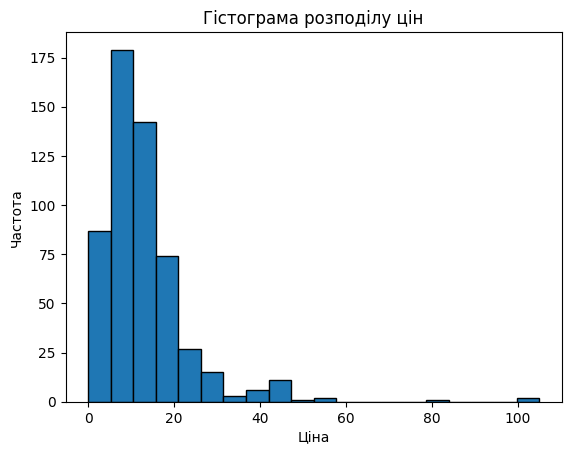

In [25]:
# Завдання "Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')"
print("Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')")
print(80*'_')
import matplotlib.pyplot as plt
table["price"].plot(kind='hist', bins=20, edgecolor='black')

# Налаштування заголовка та міток осей
plt.title("Гістограма розподілу цін")
plt.xlabel("Ціна")
plt.ylabel("Частота")

# Виведення графіку
plt.show()

In [26]:
# Завдання "Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)"
print("Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна")
print(80*'_')
max_price = table["price"].max()
min_price = table["price"].min()
mean_price = table["price"].mean()
median_price = table["price"].median()

# Виведення результатів
print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна
________________________________________________________________________________
Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


**Пошук та сортування даних**

In [27]:
# Знаходження найвищого рейтингу
max_user_rating = table["user_rating"].max()

# Підрахунок книжок з найвищім рейтингом
books_with_max_rating = table[table["user_rating"] == max_user_rating]
num_books_with_max_rating = books_with_max_rating.shape[0]

# Знаходження індексу книги з найбільшою кількістю відгуків
book_with_max_reviews_index = table["reviews"].idxmax()
# Отримання рядка з індексом книги з найбільшою кількістю відгуків
book_with_max_reviews = table.loc[book_with_max_reviews_index]

# Фільтрація за роком та рейтингом (Топ-50 в 2015 році)
top_50_2015 = table[(table["year"] == 2015) & (table["user_rating"])]
# Знаходження найвищої ціни серед книг у Топ-50 2015 року
most_expensive_book = top_50_2015.nlargest(1, "price")

# Фільтрація за роком та жанром (Топ-50 в 2010 році та жанр "Fiction")
top_50_2010_fiction = table[(table["year"] == 2010) & (table["genre"] == "Fiction")]
# Підрахунок кількості книг жанру "Fiction" у Топ-50 2010 року
num_fiction_books_2010 = top_50_2010_fiction.shape[0]

# Фільтрація за рейтингом та роком (Топ-50 з рейтингом 4.9 у 2010 та 2011 роках)
top_4_9_2010_2011 = table[((table["year"] == 2010) | (table["year"] == 2011)) & (table["user_rating"] == 4.9)]
# Підрахунок кількості книг з рейтингом 4.9 у Топ-50 2010 та 2011 років
num_books_4_9_2010_2011 = top_4_9_2010_2011.shape[0]

# Фільтрація за рейтингом та ціною (Топ-50 в 2015 році та ціна менше 8 доларів)
top_50_2015_cheaper_than_8 = table[(table["year"] == 2015) & (table["price"] < 8)]
# Сортування за зростанням ціни
sorted_books = top_50_2015_cheaper_than_8.sort_values(by="price")

# Остання книга в відсортованому списку
last_book = sorted_books.tail(1)


print("Який рейтинг у датасеті найвищий? Відповідь:", max_user_rating)
print("Скільки книг мають такий рейтинг? Відповідь:", num_books_with_max_rating)
print("Яка книга має найбільше відгуків? Відповідь:", book_with_max_reviews['name'])
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:", most_expensive_book["name"].values[0])
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:", num_fiction_books_2010)
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:", num_books_4_9_2010_2011)
print("Відсортувати за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values). Відповідь:", sorted_books)
print("Яка книга остання у відсортованому списку? Відповідь:", last_book["name"].values[0])

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing


IndexError: ignored

**Агрегування даних та з'єднання таблиць**

In [48]:
#  Максимальна та мінімальна ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min)
# Групування за жанром та знаходження максимальної та мінімальної ціни
genre_price_stats = table.groupby("genre")["price"].agg(["max", "min"])
genre_price_stats_max = table.groupby("genre")["price"].max()
genre_price_stats_min = table.groupby("genre")["price"].min()

print("Максимальні та мінімальні ціни для кожного з жанрів:", genre_price_stats)
# print(genre_price_stats)
print("Максимальна ціна для жанру Fiction:", genre_price_stats_max['Fiction'])
print("Мінімальна ціна для жанру Fiction:", genre_price_stats_min['Fiction'])
print("Максимальна ціна для жанру Non Fiction:", genre_price_stats_max['Non Fiction'])
print("Мінімальна ціна для жанру Non Fiction:", genre_price_stats_min['Non Fiction'])

Максимальні та мінімальні ціни для кожного з жанрів:              max  min
genre                
Fiction       82    0
Non Fiction  105    0
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [11]:
# Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).
# Групування за автором та знаходження кількості книг для кожного автора
author_book_count = table.groupby("author")["name"].count()

# Створення нового датафрейму
author_book_count_df = pd.DataFrame(author_book_count)
author_book_count_df.reset_index(inplace=True)
author_book_count_df.columns = ["Автор", "Кількість книг"]

# Знаходження автора з найбільшою кількістю книг
author_with_most_books = author_book_count.idxmax()
max_books_count = author_book_count.max()

# Виведення нового датафрейму
print("Кількість книг для кожного автора:")
print(author_book_count_df)

num_rows, num_columns = author_book_count_df.shape
print(' ')
print("Якої розмірності вийшла таблиця? Відповідь:")
print("Кількість рядків:", num_rows)
print("Кількість стовпців:", num_columns)
print(' ')
print("Який автор має найбільше книг? Відповідь:", author_with_most_books)
print("Скільки книг цього автора? Відповідь:", max_books_count)

Кількість книг для кожного автора:
                          Автор  Кількість книг
0              Abraham Verghese               2
1                Adam Gasiewski               1
2                 Adam Mansbach               1
3                     Adir Levy               1
4    Admiral William H. McRaven               1
..                          ...             ...
243             Walter Isaacson               3
244               William Davis               2
245            William P. Young               2
246            Wizards RPG Team               3
247                Zhi Gang Sha               2

[248 rows x 2 columns]
 
Якої розмірності вийшла таблиця? Відповідь:
Кількість рядків: 248
Кількість стовпців: 2
 
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [28]:
# Cтворіть датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean)
# Групування за автором та знаходження середнього рейтингу для кожного автора
author_avg_rating = table.groupby("author")["user_rating"].mean()

# Створення нового датафрейму
author_avg_rating_df = pd.DataFrame(author_avg_rating)
author_avg_rating_df.reset_index(inplace=True)
author_avg_rating_df.columns = ["Автор", "Середній рейтинг"]

# Виведення нового датафрейму
print("Середній рейтинг для кожного автора:")
print(author_avg_rating_df)
print("\n", "У якого автора середній рейтинг мінімальний:")
print(author_avg_rating_df.head(1))

Середній рейтинг для кожного автора:
                          Автор  Середній рейтинг
0              Abraham Verghese          4.600000
1                Adam Gasiewski          4.400000
2                 Adam Mansbach          4.800000
3                     Adir Levy          4.800000
4    Admiral William H. McRaven          4.700000
..                          ...               ...
243             Walter Isaacson          4.566667
244               William Davis          4.400000
245            William P. Young          4.600000
246            Wizards RPG Team          4.800000
247                Zhi Gang Sha          4.600000

[248 rows x 2 columns]

 У якого автора середній рейтинг мінімальний:
              Автор  Середній рейтинг
0  Abraham Verghese               4.6


In [29]:
# З'єднання двох датафреймів
combined_df = pd.concat([author_book_count_df, author_avg_rating_df["Середній рейтинг"]], axis=1)

# Сортування датафрейму за зростанням кількості книг та рейтингу
sorted_df = combined_df.sort_values(by=["Кількість книг", "Середній рейтинг"], ascending=[True, True])

# Виведення першого рядка відсортованого датафрейму
print("Перший автор у списку:")
print(sorted_df.head(1))

Перший автор у списку:
              Автор  Кількість книг  Середній рейтинг
171  Muriel Barbery               1               4.0


**Візуалізація**

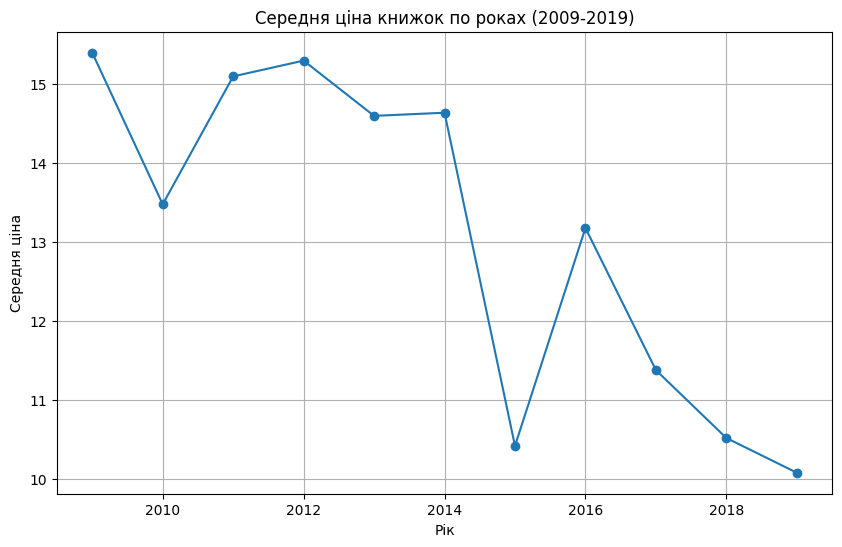

In [19]:
table['year'] = pd.to_datetime(table['year'], format='%Y')

# Вибір даних за період від 2009 до 2016 року
data_2009_2019 = table[(table['year'].dt.year >= 2009) & (table['year'].dt.year <= 2019)]

# Групування за роками та знаходження середньої ціни книжок
avg_price_by_year = data_2009_2019.groupby(data_2009_2019['year'].dt.year)['price'].mean()

# Побудова графіка
plt.figure(figsize=(10, 6))
avg_price_by_year.plot(kind='line', marker='o')
plt.title('Середня ціна книжок по роках (2009-2019)')
plt.xlabel('Рік')
plt.ylabel('Середня ціна')
plt.grid(True)
plt.show()

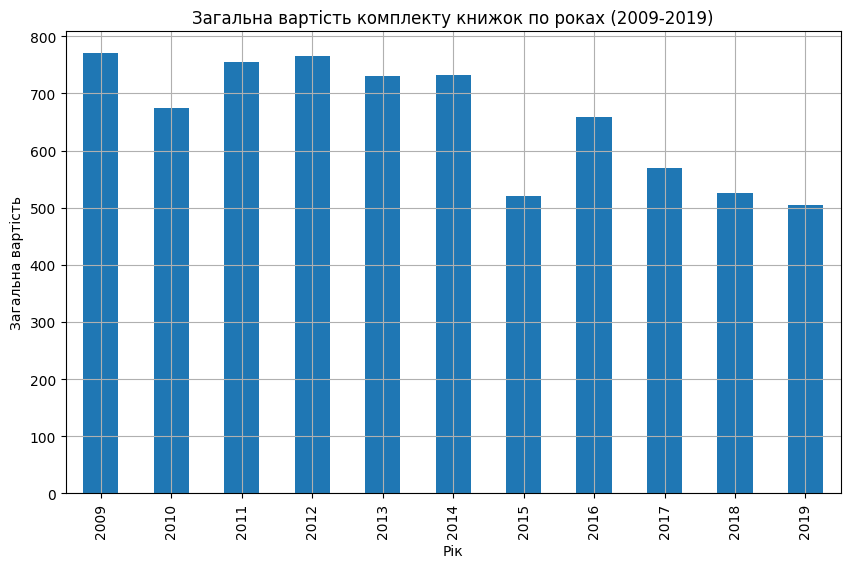

In [21]:
# Перетворення стовпця "рік" на числовий тип дати
table['year'] = pd.to_datetime(table['year'], format='%Y')

# Вибір даних за період від 2009 до 2019 року
data_2009_2019 = table[(table['year'].dt.year >= 2009) & (table['year'].dt.year <= 2019)]

# Групування за роками та обчислення загальної вартості комплекту книжок
total_price_by_year = data_2009_2019.groupby(data_2009_2019['year'].dt.year)['price'].sum()

# Побудова стовбчикової діаграми
plt.figure(figsize=(10, 6))
total_price_by_year.plot(kind='bar')
plt.title('Загальна вартість комплекту книжок по роках (2009-2019)')
plt.xlabel('Рік')
plt.ylabel('Загальна вартість')
plt.grid(True)
plt.show()

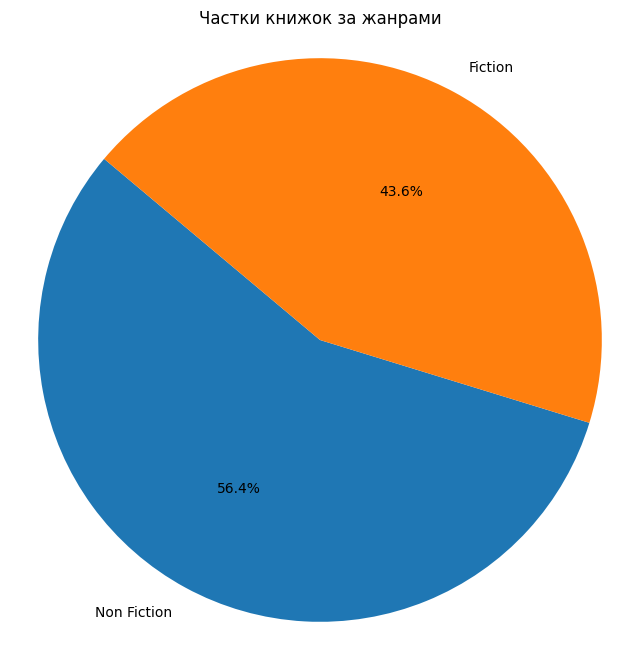

In [22]:
# Обчислення кількості книжок за кожний жанр
genre_counts = table['genre'].value_counts()

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Частки книжок за жанрами')
plt.axis('equal')
plt.show()